In [120]:
import matplotlib.pyplot as plt
import numpy as np
import time

In [121]:
def gaussianDist(N, mu, sigma):
    return np.random.normal(mu, sigma, N)

In [168]:
def kuramotoModel(N, K, dFunc, nSteps, sigma):
    omega = dFunc(N, 0, sigma)
    theta = np.random.uniform(0, 2*np.pi, N)
    psi = np.zeros((nSteps), dtype = np.float64)
    r = np.zeros((nSteps), dtype = np.float64)
    dt = 5e-4
    
    for k in range(nSteps):
        thetaSum = np.mean(np.exp(theta*1j))
        r[k], psi[k] = cm.polar(thetaSum)
        
        theta = np.add(theta, dt*(np.add(omega, K*r[k]*np.sin(np.subtract(psi[k], theta)))))

    plt.plot(np.array(range(len(r))), r)
    ax = plt.gca()
    ax.set_ylim(0, 1)

14.226865530014038


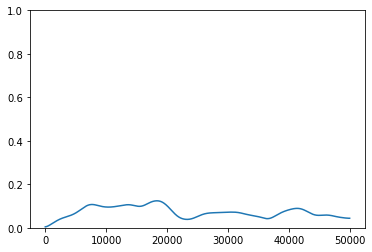

In [172]:
start = time.time()
kuramotoModel(2000, 1.5, gaussianDist, 5*10**4, 1)
end = time.time()
print(end - start)